In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [2]:
train_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"

In [16]:
X, y = make_classification(n_samples=150000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
3000/3000 [==============================] - 1s 364us/step - loss: 0.2622 - accuracy: 0.9070 - val_loss: 0.2410 - val_accuracy: 0.9182
Epoch 2/20
3000/3000 [==============================] - 1s 348us/step - loss: 0.2398 - accuracy: 0.9187 - val_loss: 0.2370 - val_accuracy: 0.9194
Epoch 3/20
3000/3000 [==============================] - 1s 348us/step - loss: 0.2363 - accuracy: 0.9203 - val_loss: 0.2349 - val_accuracy: 0.9218
Epoch 4/20
3000/3000 [==============================] - 1s 348us/step - loss: 0.2329 - accuracy: 0.9212 - val_loss: 0.2314 - val_accuracy: 0.9220
Epoch 5/20
3000/3000 [==============================] - 1s 347us/step - loss: 0.2296 - accuracy: 0.9218 - val_loss: 0.2276 - val_accuracy: 0.9225
Epoch 6/20
3000/3000 [==============================] - 1s 353us/step - loss: 0.2266 - accuracy: 0.9222 - val_loss: 0.2271 - val_accuracy: 0.9211
Epoch 7/20
3000/3000 [==============================] - 1s 359us/step - loss: 0.2236 - accuracy: 0.9232 - val_loss: 0.2257 -

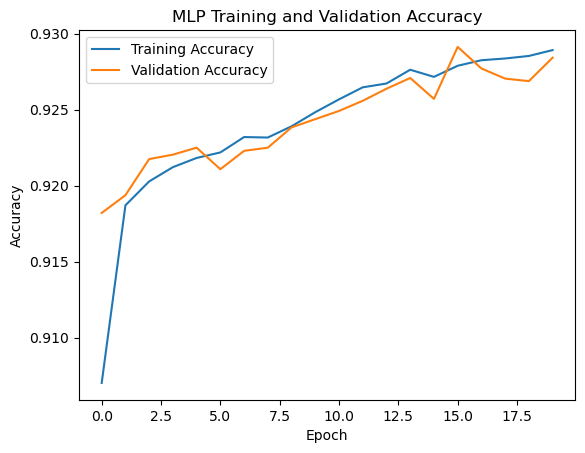

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Training and Validation Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix - MLP Model:")
print(conf_matrix)
print("\nMLP Model Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['class_0', 'class_1']))

938/938 [==============================] - 0s 201us/step
Confusion Matrix - MLP Model:
[[13918  1029]
 [ 1158 13895]]

MLP Model Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.93      0.93     14947
     class_1       0.93      0.92      0.93     15053

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000

